# **TON DUC THANG UNIVERSITY**
Information Technology Factology
INTRODUCTION TO DIGITAL IMAGE PROCESSING - DCT IMAGE COMPPRESSION
---
    Author:
      Nguyễn Sang Sinh 

### Discrete Cosine Transform

Source code reference:

```
https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm
https://tesfagabir.github.io/2016/12/04/Implementing-Discrete-Cosine-Transform-Using-Python.html
https://www.impulseadventure.com/photo/jpeg-quantization.html
```




In [ ]:
'''Import Lib'''

import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import r_
import cv2
import os


Image matrix size: (400, 400)


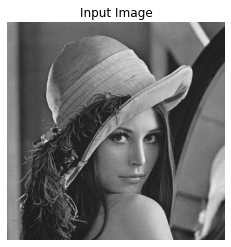

In [ ]:
'''Load image & Imshow'''
input_image_path = 'lena.jpg'
output_image_path = 'output.jpg'

f = cv2.imread(input_image_path)
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

# Scale size image f
size_x = f.shape[0] - f.shape[0] % 8
size_y = f.shape[1] - f.shape[1] % 8
f = f[:size_x,:size_y]

print('Image matrix size:', f.shape )

# Show Image
plt.imshow(f, cmap=plt.cm.gray)
plt.title('Input Image')
plt.axis('off')
plt.show()

In [ ]:
''' Parameter initialization and DCT preprocessor'''

#Declare DCT Matrix result
dctmatrix = np.zeros(np.shape(f))

#Convert into Int16 (Level shift by 128)
#https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm

f = f.astype(np.int16) 
f = f - 128  
f2 = np.zeros(np.shape(f)) 

In [ ]:
''' DCT 2D'''

#DCT Function for only single pixel
def computeSinglePoint2DCT(imge, u, v, N):
    '''Tham số
    image: ảnh đầu vào
    u: index theo trục x
    v: index theo trục y
    N: size của ảnh
    '''
    result = 0
    #Caculate Cosine
    #2-dimensional DCT formula
    #https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm
    for x in range(N):
        for y in range(N):
            result += imge[x, y] * math.cos(((2*x + 1)*u*math.pi)/(2*N)) * math.cos(((2*y + 1)*v*math.pi)/(2*N))

    #Caculate Cx in DCT
    if u == 0: result *= 1/math.sqrt(2) 
    if v == 0: result *= 1/math.sqrt(2)
    result *= 1/math.sqrt(2*N)

    return result

#DCT for image
def compute2DDCT(imge):
    # Since each block is 8x8 inputs, we assume the input image matrix is a square matrix
    N = imge.shape[0]
    final2DDCT = np.zeros([N, N], dtype=float)
    for u in range(N):
        for v in range(N):
            #DCT for single pixel
            final2DDCT[u, v] = computeSinglePoint2DCT(imge, u, v, N)
    return final2DDCT

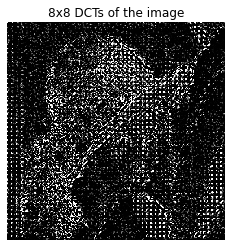

In [ ]:
'''DCT Matrix'''

#Declare DCT Matrix 
imsize = f.shape
dctmatrix = np.zeros(np.shape(f))

# Excute for each block
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dctmatrix[i:(i+8),j:(j+8)] = compute2DDCT(f[i:(i+8),j:(j+8)])

# Plot DCT Matrix result
plt.figure()
plt.imshow(dctmatrix,cmap='gray',vmax = np.max(dctmatrix)*0.01,vmin = 0)
plt.axis('off')
plt.title("8x8 DCTs of the image")
plt.show()

In [ ]:
''' IDCT 2D'''

#IDCT Function for only single pixel
def computeSinglePointIDCT(dctImge, x, y, N):
    '''Tham số
      image: ảnh đầu vào
      u: index theo trục x
      v: index theo trục y
      N: size của ảnh
      '''
    result = 0
    #Caculate Cosine
    for u in range(N):
        for v in range(N):
            ##Caculate Cx in IDCT
            val = 1
            if u == 0: val *= 1/math.sqrt(2)
            if v == 0: val *= 1/math.sqrt(2)       
            result += val * dctImge[u, v] * math.cos(((2*x + 1)*u*math.pi)/(2*N)) * math.cos(((2*y + 1)*v*math.pi)/(2*N))
    result *= 2/N
    return result

def compute2DIDCT(imge):
      
    # Since each block is 8x8 inputs, we assume the input image matrix is a square matrix
    N = imge.shape[0]
    finalInverse2DDCT = np.zeros([N, N], dtype=float)
    for x in range(N):
        for y in range(N):
            #IDCT for single pixel
            finalInverse2DDCT[x, y] = computeSinglePointIDCT(imge, x, y, N)
    return finalInverse2DDCT

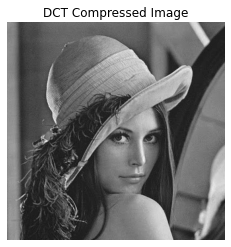

In [ ]:
# Excute IDCT for each block
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        f2[i:(i+8),j:(j+8)] = compute2DIDCT(dctmatrix[i:(i+8),j:(j+8)])

f2 = f2 + 128 # Intensity shift to initial

# Plot IDCT Matrix result
plt.imshow(f2, cmap=plt.cm.gray)
plt.axis('off')
plt.savefig(output_image_path)
plt.title("DCT Compressed Image")
plt.show()   

### Evaluate DCT Method

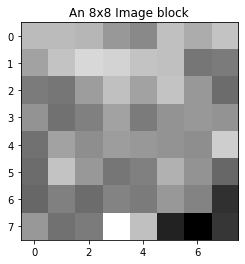

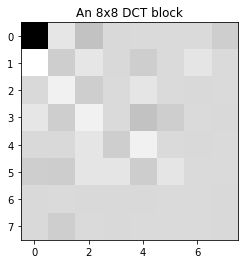

In [ ]:
'''Check Block DCT'''
pos = 128

# Extract 8x8 block from image

plt.imshow(f[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")
plt.show()

# Display block 8x8 from DCT
plt.imshow(dctmatrix[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 DCT block")
plt.show()

In [ ]:
''' Check compressed image size'''
import os
size_input =  os.stat(input_image_path).st_size
size_output = os.stat(output_image_path).st_size
print("Size of input Image:", size_input, "byte")
print("Size of output Image after compressed:", size_output, "byte")
print("Reduce %.4f" %(size_input / size_output))

Size of input Image: 47993 byte
Size of output Image after compressed: 22189 byte
Reduce 2.1629


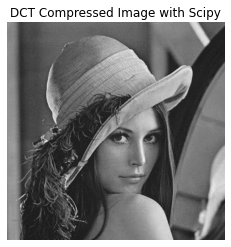

In [ ]:
'''Compare Scipy library'''
import scipy

#DCT2D
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

#IDCT2D
def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

#Declare image size and DCT matrix
imsize = f.shape
dct = np.zeros(imsize)

# Do each 8x8 DCT block on the image
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( f[i:(i+8),j:(j+8)] )

# Do each 8x8 IDCT block on the image
im_dct = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
        
# Display and save image
plt.figure()
plt.imshow(im_dct, cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('lib_'+ output_image_path)
plt.title("DCT Compressed Image with Scipy")
plt.show()

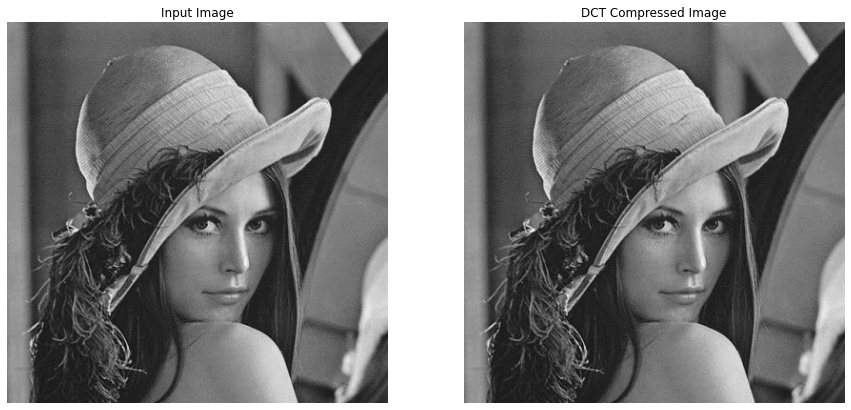

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))

# Display image
ax1.imshow(f, cmap=plt.cm.gray)
ax1.set_title('Input Image')
ax1.axis('off')

ax2.imshow(f2, cmap=plt.cm.gray)
ax2.set_title("DCT Compressed Image")
ax2.axis('off')

plt.show()

In [ ]:
size_input =  os.stat('lena.jpg').st_size
size_output = os.stat('lib_'+ output_image_path).st_size
print("Size of input Image:", size_input, "byte")
print("Size of output Image after compressed:", size_output, "byte")
print("Reduce %.4f" %(size_input / size_output))

Size of input Image: 47993 byte
Size of output Image after compressed: 22189 byte
Reduce 2.1629


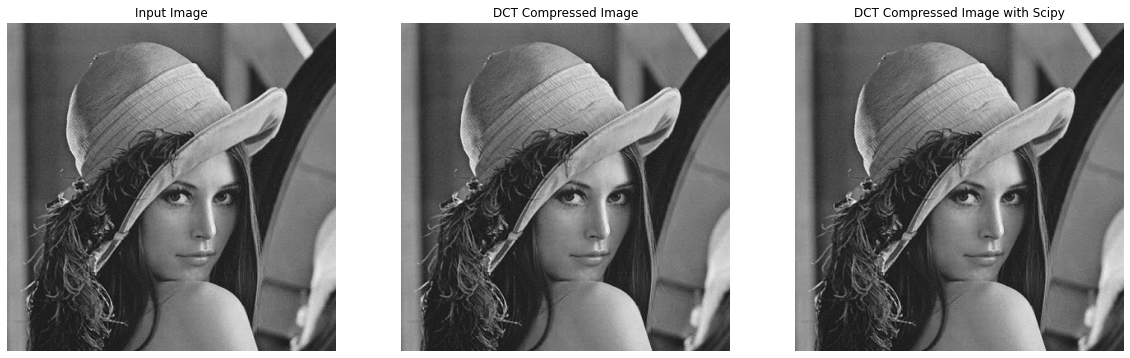

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,20))

ax1.imshow(f, cmap=plt.cm.gray)
ax1.set_title('Input Image')
ax1.axis('off')

ax2.imshow(f2, cmap=plt.cm.gray)
ax2.set_title("DCT Compressed Image")
ax2.axis('off')

ax3.imshow(im_dct, cmap=plt.cm.gray)
ax3.set_title("DCT Compressed Image with Scipy")
ax3.axis('off')

plt.show()